In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset from csv file
def read_data(file):
    data = pd.read_csv(file, header=None , index_col=None)
    return data
data = read_data('data.txt')
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#shuffling and splitting of the dataset
def split_data(data):
    df = pd.DataFrame(data)
    #shuffle the dataset
    df = df.sample(frac=1)
    #split the dataset
    split = np.random.rand(len(df)) < 0.7
    train = np.asmatrix(df[split], dtype = 'float64')
    test = np.asmatrix(df[~split], dtype = 'float64')
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:,-1]
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test = split_data(data)

In [4]:
#initializing params
alpha = 0.002
epoch = 100
W = np.zeros(X_train.shape[1]+1)

In [5]:
#activation function
def activation(z):
        if z>=0:
            return 1
        else:
            return 0   

In [6]:
#prediction function
def predict(x):
    z = np.dot(x, W[1:]) + W[0]
    g = activation(z)
    return g

epoch:0  weight:[ 0.026      -0.04366173 -0.04366173 -0.04366173 -0.04366173]  learning rate:0.002  Training Accuracy:94.94845360824742
epoch:1  weight:[ 0.044      -0.08074668 -0.08074668 -0.08074668 -0.08074668]  learning rate:0.002  Training Accuracy:95.36082474226805
epoch:2  weight:[ 0.072      -0.12648632 -0.12648632 -0.12648632 -0.12648632]  learning rate:0.002  Training Accuracy:95.05154639175257
epoch:3  weight:[ 0.098      -0.16870816 -0.16870816 -0.16870816 -0.16870816]  learning rate:0.002  Training Accuracy:95.15463917525773
epoch:4  weight:[ 0.124   -0.21093 -0.21093 -0.21093 -0.21093]  learning rate:0.002  Training Accuracy:95.15463917525773
epoch:5  weight:[ 0.15       -0.25315184 -0.25315184 -0.25315184 -0.25315184]  learning rate:0.002  Training Accuracy:95.15463917525773
epoch:6  weight:[ 0.176      -0.29537369 -0.29537369 -0.29537369 -0.29537369]  learning rate:0.002  Training Accuracy:95.15463917525773
epoch:7  weight:[ 0.2        -0.33286973 -0.33286973 -0.3328697

epoch:62  weight:[ 1.476      -2.23279648 -2.23279648 -2.23279648 -2.23279648]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:63  weight:[ 1.496      -2.26286522 -2.26286522 -2.26286522 -2.26286522]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:64  weight:[ 1.516      -2.29293396 -2.29293396 -2.29293396 -2.29293396]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:65  weight:[ 1.536     -2.3230027 -2.3230027 -2.3230027 -2.3230027]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:66  weight:[ 1.556      -2.35307144 -2.35307144 -2.35307144 -2.35307144]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:67  weight:[ 1.576      -2.38314019 -2.38314019 -2.38314019 -2.38314019]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:68  weight:[ 1.596      -2.41320893 -2.41320893 -2.41320893 -2.41320893]  learning rate:0.002  Training Accuracy:95.4639175257732
epoch:69  weight:[ 1.616      -2.44327767 -2.44327767

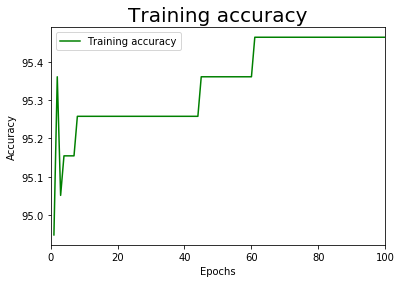

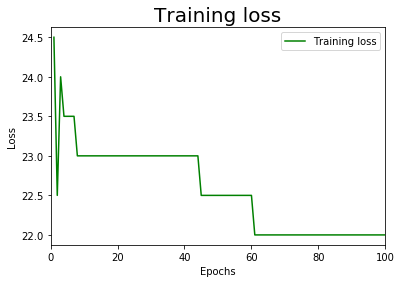

In [7]:
#training to learn the weights
def train(X_train, y_train):
        loss_train = []
        train_acc = []
        epochs = range(1,epoch+1)
        for i in range(epoch):
            correct = 0
            cost = 0 
            for x, y in zip(X_train, y_train):
                prediction = predict(x)
                y = np.array(y)[0][0]
                x = np.array(x)[0]
                error = y - prediction
                actual_value = int(y)
                if actual_value == prediction:
                    correct += 1
                W[1:] += alpha * error * x[0]
                W[0] += alpha * error
                cost += error**2
            cost = cost/2     
            training_accuracy =  correct/float(X_train.shape[0])*100.0  
            loss_train.append(cost)
            train_acc.append(training_accuracy)
            print("epoch:"+str(i)+"  weight:"+str(W)+"  learning rate:"+str(alpha)+"  Training Accuracy:"+str(training_accuracy))
        plt.plot(epochs, train_acc, 'g', label='Training accuracy')        
        plt.xlim(0,epoch)
        plt.title('Training accuracy',fontsize=20)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        plt.plot(epochs, loss_train, 'g', label='Training loss')        
        plt.xlim(0,epoch)
        plt.title('Training loss',fontsize=20)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

train(X_train, y_train)            

Predictions on test data:
X: [[ 1.296   4.2855 -4.8457 -2.9013]] prediction: 1 Actual value:1
X: [[-2.7914   1.7734   6.7756  -0.39915]] prediction: 0 Actual value:0
X: [[3.577   2.4004  1.8908  0.73231]] prediction: 0 Actual value:0
X: [[-1.2846  3.2715 -1.7671 -3.2608]] prediction: 1 Actual value:1
X: [[-2.0962  -7.1059   6.6188  -0.33708]] prediction: 1 Actual value:1
X: [[-2.4561   -4.5566    6.4534   -0.056479]] prediction: 1 Actual value:1
X: [[-3.4605   2.6901   0.16165 -1.0224 ]] prediction: 1 Actual value:1
X: [[ 0.37637 -0.82358  0.78543  0.74524]] prediction: 0 Actual value:1
X: [[ 3.583   -3.7971   3.4391  -0.12501]] prediction: 0 Actual value:0
X: [[-0.2951   9.0489  -0.52725 -2.0789 ]] prediction: 0 Actual value:0
X: [[ 1.8314    6.3672   -0.036278  0.049554]] prediction: 0 Actual value:0
X: [[ 2.5328   7.528   -0.41929 -2.6478 ]] prediction: 0 Actual value:0
X: [[ 4.0932   5.4132  -1.8219   0.23576]] prediction: 0 Actual value:0
X: [[-0.97325 -6.4168   5.6026   1.0323 ]]

X: [[ -2.9672 -13.2869  13.4727  -2.6271]] prediction: 1 Actual value:1
X: [[-0.59587  2.4811  -2.8673  -0.89828]] prediction: 1 Actual value:1
X: [[-0.78289 11.3603  -0.37644 -7.0495 ]] prediction: 0 Actual value:0
X: [[ 3.4566  9.5228 -4.0112 -3.5944]] prediction: 0 Actual value:0
X: [[-3.7244    1.9037   -0.035421 -2.5095  ]] prediction: 1 Actual value:1
X: [[-6.5773   6.8017   0.85483 -7.5344 ]] prediction: 1 Actual value:1
X: [[-1.8387  -6.301    5.6506   0.19567]] prediction: 1 Actual value:1
X: [[ 1.3451   0.23589 -1.8785   1.3258 ]] prediction: 0 Actual value:1
X: [[ 5.2868  3.257  -1.3721  1.1668]] prediction: 0 Actual value:0
X: [[-2.1786  -6.4479   6.0344  -0.20777]] prediction: 1 Actual value:1
X: [[ 3.931     1.8541   -0.023425  1.2314  ]] prediction: 0 Actual value:0
X: [[ 2.5605  9.2683 -3.5913 -1.356 ]] prediction: 0 Actual value:0
X: [[-1.5055    0.070346  6.8681   -0.50648 ]] prediction: 0 Actual value:0
X: [[ 1.2198   2.0982  -3.1954   0.12843]] prediction: 1 Actual 

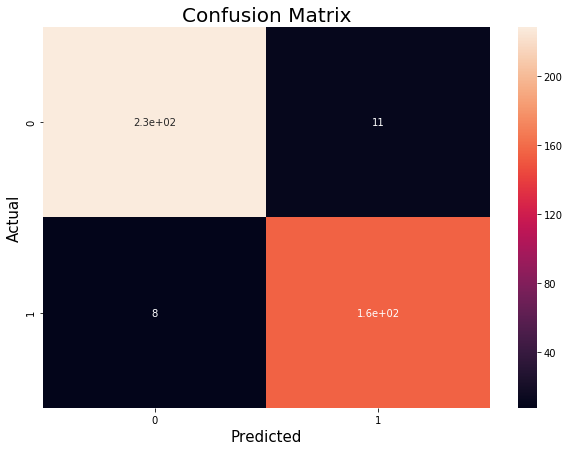

In [8]:
#Testset accuracy, Confusion Matrix and Accuracy metrics
def test(X_test, y_test):
    print("Predictions on test data:")
    correct = 0
    tp,fp,tn,fn = 0,0,0,0
    for x,y in zip(X_test,y_test):
        prediction = predict(x)
        actual_value = int(np.array(y)[0][0])
        print("X: "+str(x)+" prediction: "+str(prediction)+" Actual value:"+str(actual_value))
        if actual_value == prediction:
          correct += 1
        if actual_value == 0 and prediction == 0:
          tp += 1
        if actual_value == 1 and prediction ==1:
          tn += 1
        if actual_value == 0 and prediction ==1:
          fn += 1
        if actual_value == 1 and prediction == 0:
          fp += 1  
    test_accuracy =  correct/float(X_test.shape[0])*100.0
    print("Test Accuracy:"+str(test_accuracy))
    print()
    print("Accuracy metrics:")
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print("Accuracy: "+str(accuracy))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print()    
    print("Confusion matrix:")
    cm = [[tp,fp],[fn,tn]]
    print(cm)
    print()
    df_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix', fontsize = 20) 
    plt.xlabel('Predicted', fontsize = 15) 
    plt.ylabel('Actual', fontsize = 15) 

plt.show()
test(X_test, y_test)
